## Motivating Example

A Geiger counter is a device used for measuring radiation in the atmosphere. Each time it detects a radioactive particle, it makes a clicking sound. In the figure below, the orange points below indicate the times at which the Geiger counter detected a radioactive particle.

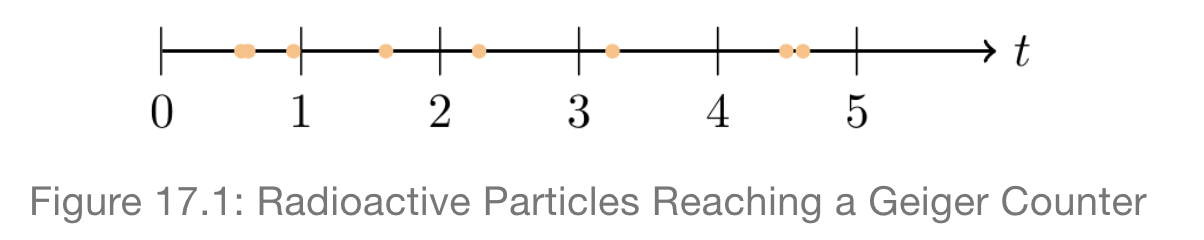

The radioactive particles hit the Geiger Counter at seemingly random and unpredictable times. In this lesson, we learn to make sense of the randomness.

## Theory

- If you are dealing with some process that measures arrival of some event for a discrete length of time, you can consider using a Poisson process

- The idea is the same as the poisson distribution we discussed earlier
    - Previously, if we had a large count of observations $n$, and a small probability of an observation occuring $p$, then Poisson approximation can apply
    - In this case, we assume a Poisson process for some time period, because a time period can be subdivided into small units of time, and the probability of an event occuring in each unit is small
    - Note that the assumption is that, in a small enough period of time, you either get 1 event or no events. You **cannot** have 2 or more events (else it is no longer binomial) 

- Definition 17.1: A Poisson process of rate $\lambda$ is characterised by the following properties
    - The number of arrivals in interval $(t_0, t_1)$ follows a Poisson distribution with $\mu = \lambda(t_1 - t_0)$. That is, $\mu$ increases proportionally to the length of the interval
    - The number of arrivals in non-overlapping intervals are independent

- Example 17.1: In San Luis Obispo, radioactive particles reach a Geiger counter according to a Poisson process at a rate of $\lambda = 0.8$ particles per second. 
    - What is the probability that the Geiger counter detects 3 or more particles in the next 4 seconds?
        - 4 seconds --> $\mu = 0.8 * 4 = 3.2$
        - So P(X >= 3) = 1 - P(X <= 2) = 1 - F(2) = 1 - f(2) - f(1) - f(0) ~ 0.62
    - What is the probability that the Geiger counter detects (exactly) 1 particle in the next second and 3 or more in the next 4 seconds?
        - These are **overlapping** time periods, so they are not independent
        - We are trying to find the joint probability P(1 particle in next second, >=3 particles in next 4 seconds)
        - While these are not independent, we can still break these into independent time periods [0, 1], and [1,4]
        - That means, for [0,1], you want to know P(X=1), and for [1,4], you want to know P(X >= 2) = 1 - P(X <= 1) = 1 - F(1) = 1 - f(1) - f(0) ~ 0.2486

In [3]:
import scipy
import numpy as np

'''
What is the probability that the Geiger counter detects 3 or more particles in the next 4 seconds?
'''
print(1-np.sum(scipy.stats.poisson.pmf(mu=3.2, k=range(3))))

'''
What is the probability that the Geiger counter detects (exactly) 1 particle in the next second and 3 or 
more in the next 4 seconds?
'''
one_in_next_second=scipy.stats.poisson.pmf(mu=0.8, k=1)
two_or_more_in_next3seconds=1 - np.sum(scipy.stats.poisson.pmf(mu=2.4, k=range(2)))
joint_prob=one_in_next_second*two_or_more_in_next3seconds
print(joint_prob)


0.6200962589216269
0.24858997647262115
